In [ ]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Random
using Statistics

In [ ]:
?DINEOF_svds!

search: DINEOF_svds! DINEOF_svd



```
U,S,V,=DINEOF_svds!()
```

# DINEOF SVD decomposition with filling in of missing points.

# Input:

  * `X`: a two-dimensional array of size MxN with N<=M already filled in with a first guess in points with missing values
  * `missingvalues`: array of size Px2 collecting the indexes for the P missing values in location missingvalues[:,1] and missingvalues[:,2]. There is no distinction between missing values and topologically excludes points. All will be filled
  * `crossvalidation`:  array of size Qx2 collecting the indexes for the Q points to be used for cross validation
  * `keeprestart`: Boolean. If true the method keeps track of the best reconstruction up to now while doing further iterations.
  * `ncmax`: maximum number of eigenvalues calculated
  * `itstart` : defines the number of modes used during the first iteration. Then one at a time is added
  * `dineofmaxiter` : Maximum number of iterations during a SVD decomposition/filling in loop
  * `dineoftol`: Defines the tolerance below which the iterations are stopped. Relative change of xxxxx

For the other parameters, see DINEOF_svd

# Output:

  * `U,S,V`: the filled SVD decomposition such that in the infiltered version U*S*V' is the best approximation of X with nele singular vectors.
  * WARNING: X is updated at the missing data points !!!!!!


This is the basic DINEOF iterative method to find a SVD decomposition with an incomplete matrix. If you know how to prepare the data from ND to this 2D array you can work directly with this function. Otherwise use a higher level function DINEOFrun.

In [ ]:
Random.seed!(123)

MersenneTwister(UInt32[0x0000007b], Random.DSFMT.DSFMT_state(Int32[1464307935, 1073116007, 222134151, 1073120226, -290652630, 1072956456, -580276323, 1073476387, 1332671753, 1073438661  …  138346874, 1073030449, 1049893279, 1073166535, -1999907543, 1597138926, -775229811, 32947490, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000000

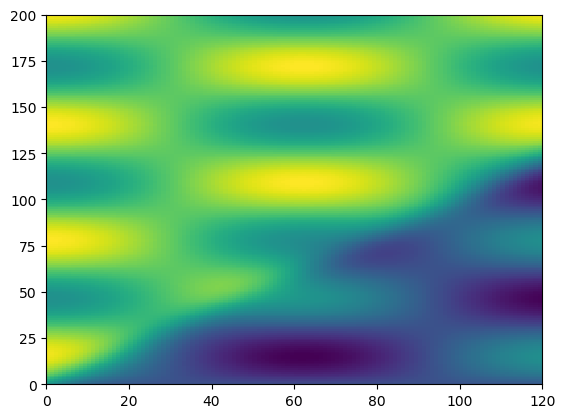

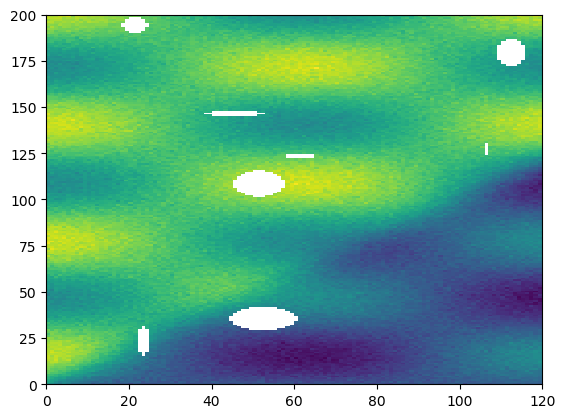

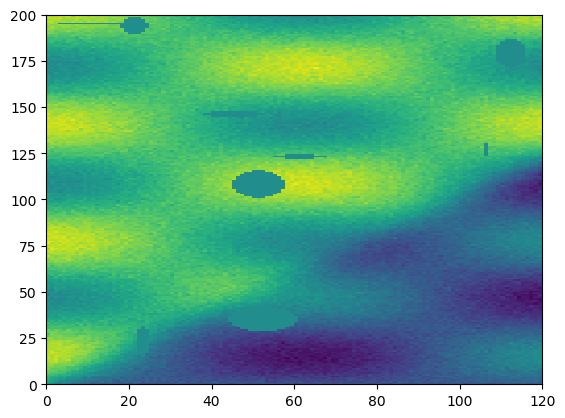

PyObject <matplotlib.collections.PolyCollection object at 0x0000000048057908>

In [ ]:
NX=200
NY=120
X=zeros(Float64,NX,NY)
      for j=1:NY
            for i=1:NX
        X[i,j]=sin(i/10)*cos(j/20)+tanh((i-j)/10)
            end
        end
pcolor(X)
figure()
# use cvmask routing to create some bubbles and missing points
X=X+0.1*randn(size(X))
cvmask=DINEOF_cvmask(X,0.02,cvmethod="Bubbles",maxbubblesize=[20,20])
X[cvmask].=NaN
# Now real cv mask
cvmask=DINEOF_cvmask(X,0.05,cvmethod="Bubbles",maxbubblesize=[20,20])
pcolor(X)
XORI=deepcopy(X)
NM=sum(isnan.(X))
missingvalues=zeros(Int,(NM,2))
    icount=0
    for j=1:size(X)[2]
        for i=1:size(X)[1]
            if isnan(X[i,j])
                icount=icount+1
                missingvalues[icount,1]=i
                missingvalues[icount,2]=j
                # Put a random value with average variance of present data so that we can keep an eye on how total variane
                # behaves.
                X[i,j]=0
            end
        end
    end
cvpoints=zeros(Int,(sum(cvmask),2))
    icount=0
    for j=1:size(X)[2]
        for i=1:size(X)[1]
        if  cvmask[i,j]
                icount=icount+1
                cvpoints[icount,1]=i
                cvpoints[icount,2]=j
                
            end
        end
    end
figure()
pcolor(X)


Defaults only

In [ ]:
U,S,V,cv,cva=DINEOF_svds!(X,missingvalues,cvpoints,ncmax=5)

(varmatrix, meanmatrix, varmatrixp) = (0.9752964467750473, 0.3822095334422443, 0.9996632382063266)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (0.5326611536522717, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (0.019491603515562037, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (0.0011962473838548562, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (8.864197762971105e-5, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (7.001888192435831e-6, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (5.654550083981022e-7, 0.97

┌ Warning: You should subtract a mean value from your data
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:75


(varchange / (size(missingvalues))[1], varmatrix) = (0.003664401057647951, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (0.00028480792587024125, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (2.4526033113087273e-5, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (2.303483492501824e-6, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (2.641632356795337e-7, 0.9752964467750473)
(iloop, varchange) = (2, 0.0001545354928725272)
cvval = 591.1498704262186
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (0.08509890873841959, 0.9752964467750473)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varch

┌ Warning: Strange
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:270
┌ Warning: Initial Variance has been increased for filtered matrix  by factor 1.1436300412278209
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:276


([-0.08280609093094538 -0.011967561355372552 … -0.03381999905400291 0.10165558094868726; -0.08330875883394011 -0.0005198297017386944 … -0.03963537877005984 0.07229964527110987; … ; 0.05793936697732082 0.08710121479733042 … 0.003206593056265702 -0.08645304776215142; 0.0561775175141732 0.087549122907977 … 0.006916133368550373 -0.05900826476368682], [125.55569094460513, 78.06019708012425, 69.67554025065269, 20.717018507726426, 9.559773891567634], [0.02536306515570259 0.20726470450217152 … -0.1374013984290459 0.1815798846168411; 0.02553320242786053 0.2048354300152128 … -0.1458498509493212 0.17305867747124523; … ; 0.026800835852886253 0.005181699278719481 … 0.1516858973347815 0.06383568074916221; 0.026089364585637532 0.010254260116222373 … 0.1621555712552951 0.039803681806556246], 0.09670304573677628, [0.35609643234189325, 0.4976009010321706, 0.18794475397331745, 0.10990662078307586, 0.09670304573677628])

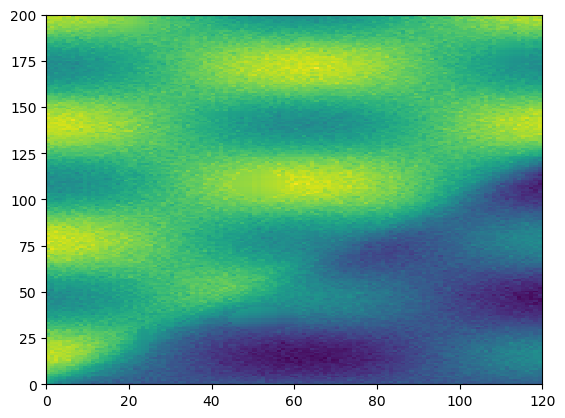

PyObject <matplotlib.collections.PolyCollection object at 0x0000000048E7C278>

In [ ]:
pcolor(X)

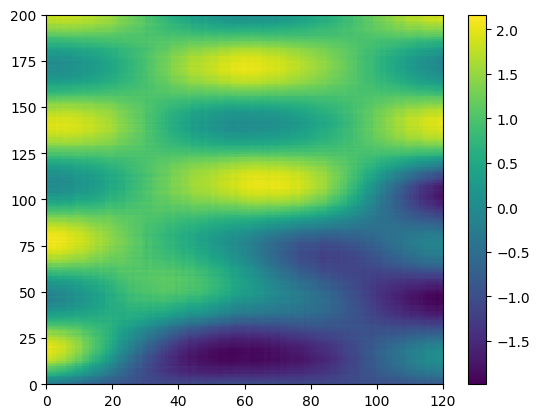

(PyObject <matplotlib.collections.PolyCollection object at 0x000000004C6248D0>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000004D4416A0>)

In [ ]:

pcolor(U*diagm(S)*V'),colorbar()

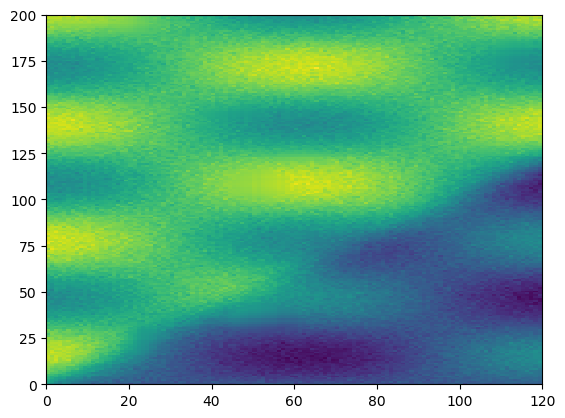

PyObject <matplotlib.collections.PolyCollection object at 0x000000004D5FCDA0>

In [ ]:
X=deepcopy(XORI)
DINEOF_fuse!(X,U*diagm(S)*V',10)
pcolor(X)

In [ ]:
X=deepcopy(XORI)

200×120 Array{Float64,2}:
 0.218735  0.0343256  -0.191273   …  -0.891053  -0.847946   -0.970491 
 0.502907  0.358108    0.0704869     -0.743091  -0.761977   -0.840981 
 0.606791  0.391246    0.325056      -0.766155  -0.580835   -0.71749  
 0.726186  0.574245    0.369344      -0.648603  -0.656046   -0.707342 
 0.819107  0.639225    0.698453      -0.642786  -0.473378   -0.65252  
 0.959583  0.907972    0.774662   …  -0.487413  -0.467832   -0.547632 
 1.27856   1.08541     1.09794       -0.282911  -0.458674   -0.524018 
 1.31328   1.30832     1.18674       -0.470059  -0.435833   -0.522744 
 1.47377   1.24595     1.17919       -0.147754  -0.0942621  -0.381302 
 1.53729   1.41452     1.30438       -0.245685  -0.347643   -0.214076 
 1.61775   1.56305     1.4014     …  -0.13713   -0.277916   -0.125948 
 1.64699   1.71849     1.55325       -0.205216  -0.0253182  -0.0201675
 1.70712   1.84101     1.87834       -0.142924  -0.106601    0.103276 
 ⋮                                ⋱                

In [ ]:
X=deepcopy(XORI)
@time U,S,V,cv,cva=DINEOF_svds!(X,missingvalues,cvpoints;ncmax=5,filter="pmf",filterrepetitions=5)

(varmatrix, meanmatrix, varmatrixp) = (NaN, NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix)

([0.08320407773550342; 0.08363101352975218; … ; -0.05709114294862552; -0.056904428592046745], [125.20222498224302], [-0.02551326190311355; -0.025785948995046905; … ; -0.02979126177970992; -0.028895775151712502], 8.417508417508417e34, [NaN, NaN, NaN, NaN])

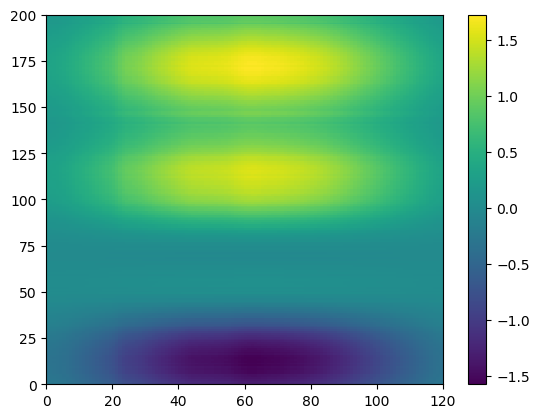

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000045CEB908>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000047B486D8>)

In [ ]:
pcolor(U*diagm(S)*V'),colorbar()

In [ ]:
X=deepcopy(XORI)
@time U,S,V,cv,cva=DINEOF_svds!(X,missingvalues,cvpoints;ncmax=5,filter="pmf",svdtol=0.0001,filterrepetitions=5)

(varmatrix, meanmatrix, varmatrixp) = (NaN, NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "pmf", 1.0)
(varchange / (size(missingvalues))[1], varmatrix)

([-0.08320407773550342; -0.08363101352975223; … ; 0.05709114294862553; 0.05690442859204676], [125.20222498224304], [0.025513261903113548; 0.025785948995046885; … ; 0.02979126177970992; 0.02889577515171253], 8.417508417508417e34, [NaN, NaN, NaN, NaN])

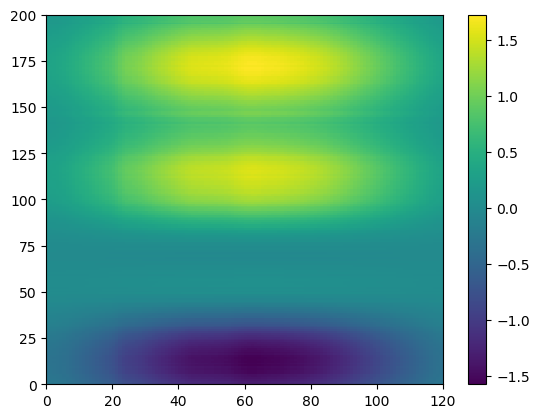

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000047B73780>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000004F342550>)

In [ ]:
pcolor(U*diagm(S)*V'),colorbar()

In [ ]:
cva

4-element Array{Float64,1}:
 NaN
 NaN
 NaN
 NaN

In [ ]:
X=deepcopy(XORI)
@time U,S,V,cv,cva=DINEOF_svds!(X,missingvalues,cvpoints;ncmax=5)

(varmatrix, meanmatrix, varmatrixp) = (NaN, NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], varmatrix) = (NaN, NaN)
(svdmeth, filter, filterintensity) = ("svd", "None", 1.0)
(varchange / (size(missingvalues))[1], va

([-0.0831208230547702; -0.08358125751763829; … ; 0.05679158107064403; 0.056570201178792336], [125.29306539152303], [0.024930332736823966; 0.025010509620342306; … ; 0.028280313046373906; 0.027550287815773962], 8.417508417508417e34, [NaN, NaN, NaN, NaN])

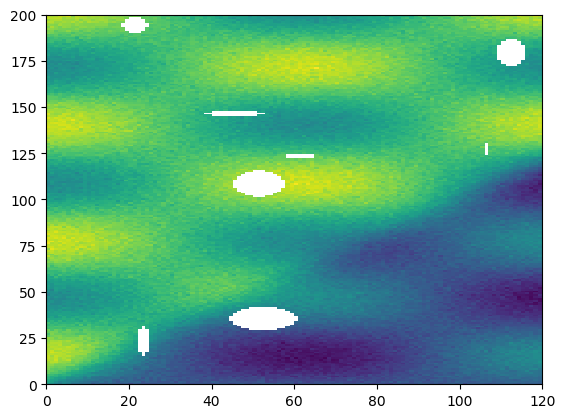

PyObject <matplotlib.collections.PolyCollection object at 0x000000004F3735F8>

In [ ]:
pcolor(XORI)

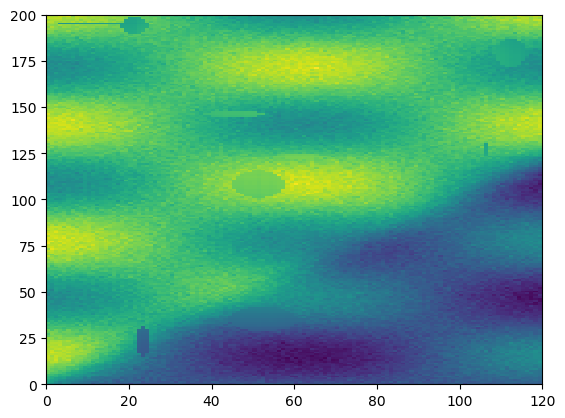

PyObject <matplotlib.collections.PolyCollection object at 0x0000000051935860>

In [ ]:
pcolor(X)

In [ ]:
X=deepcopy(XORI)
DINEOF_fuse!(X,U*diagm(S)*V',10)

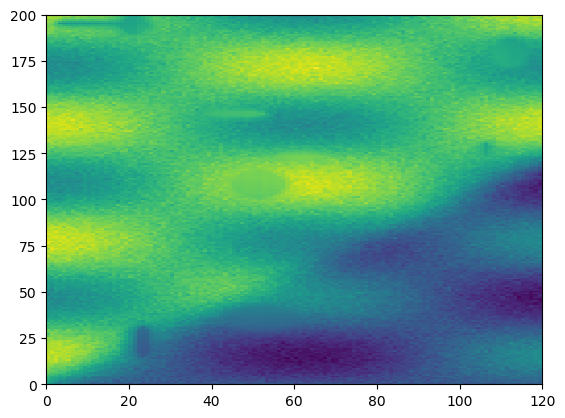

PyObject <matplotlib.collections.PolyCollection object at 0x000000005278C048>

In [ ]:
pcolor(X)